# Step 1

Download the Dataset
Download the image in the following link:
https://robogarden.s3.us-west-2.amazonaws.com/content/mini-project/cat.png


# Step 2

Reading an image
Read an image using matplotlib.
Hint: You can use any alternative library for reading images. Check out OpenCV, skimage, etc.

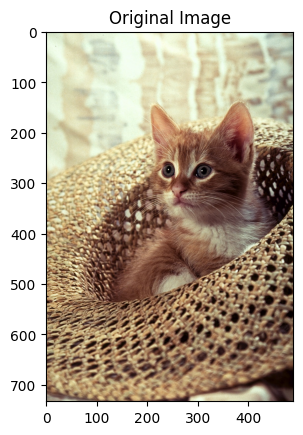

In [67]:
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Load image
img = plt.imread('cat.png')  # Replace with the path to the actual image

# Original image
plt.imshow(img)
plt.title('Original Image')
plt.show()

# Step 3

Re-organize
Re-organize the pixels as a 2D array with dimensions (number of pixels, 3).
In other words, a dataset with number of pixels samples and 3 columns.

In [68]:
# Re-organize the image pixels
pixels = img.reshape(-1, 3)  # Reshape to (num_pixels, 3)

# Let's print out the shape of the original image and the re-organized pixels for clarity
original_shape = img.shape
reorganized_shape = pixels.shape

(original_shape, reorganized_shape)

((733, 490, 3), (359170, 3))

# Step 4

Clustering

Use K-means to cluster the data into 10 clusters.
Replace each pixel by its cluster center.
Re-organize the pixels into a 3D array to show the image.
Question: What happens to the compressed image if k increases?

In [69]:
from sklearn.cluster import KMeans

# Number of clusters
num_clusters = 2

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, tol=0.01,  random_state=0)
kmeans.fit(pixels)

KMeans(n_clusters=2, random_state=0, tol=0.01)

In [70]:
# Replace each pixel with its cluster center
cluster_centers = kmeans.cluster_centers_
clustered_pixels = np.array([cluster_centers[label] for label in kmeans.labels_])

# Re-organize the clustered pixels back into the original image shape using original_shape
clustered_image = clustered_pixels.reshape(original_shape)

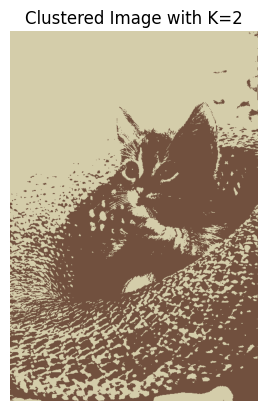

In [71]:
# Display the resulting image
plt.imshow(clustered_image)
plt.title(f'Clustered Image with K={num_clusters}')
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [72]:
# Save the compressed image to a file
plt.imsave(f'cat_compressed_K-{num_clusters}.png', clustered_image)

In [73]:
# Get the file size
import os

# Save the compressed image with the number of clusters in the filename
filename = f'cat_compressed_K-{num_clusters}.png'
plt.imsave(filename, clustered_image)

# Use os.path.getsize() to get the file size in bytes
file_size_bytes = os.path.getsize(filename)

# Optionally, convert the file size to kilobytes (KB) for easier reading
file_size_kb = file_size_bytes / 1024

print(f'The file size of "{filename}" is {file_size_bytes} bytes ({file_size_kb:.2f} KB).')

The file size of "cat_compressed_K-2.png" is 31622 bytes (30.88 KB).


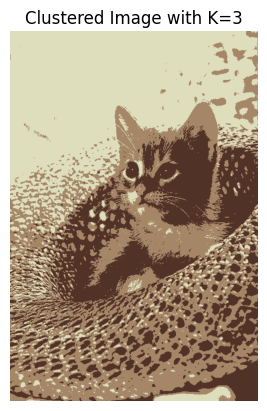

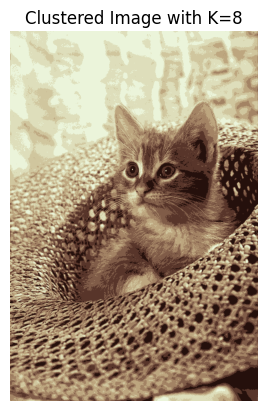

['K: 3, kb: 45.6', 'K: 8, kb: 113.6']


In [74]:
file_sizes = []
cluster_range = range(3,11, 5)

for k in cluster_range:
    # Apply K-means clustering
    kmeans = KMeans(n_clusters=k, tol=0.01,  random_state=0)
    kmeans.fit(pixels)
    # Replace each pixel with its cluster center
    cluster_centers = kmeans.cluster_centers_
    clustered_pixels = np.array([cluster_centers[label] for label in kmeans.labels_])
    # Re-organize the clustered pixels back into the original image shape using original_shape
    clustered_image = clustered_pixels.reshape(original_shape)
    # Display the resulting image
    plt.imshow(clustered_image)
    plt.title(f'Clustered Image with K={k}')
    plt.axis('off')  # Hide axes for better visualization
    plt.show()
    # Save the compressed image to a file
    plt.imsave(f'cat_compressed_K-{k}.png', clustered_image)
    # Get the file size
    filename = f'cat_compressed_K-{k}.png'
    plt.imsave(filename, clustered_image)
    # Use os.path.getsize() to get the file size in bytes
    file_size_bytes = os.path.getsize(filename)
    # Optionally, convert the file size to kilobytes (KB) for easier reading
    file_size_kb = round(file_size_bytes / 1024,1)
    # Append the list
    file_sizes.append(f'K: {k}, kb: {file_size_kb}')

print(file_sizes)

# Step 6

Challenge Yourself (Optional)
Try to Use Mean Shift or Hierarchical clustering algorithm instead of k-means. Does it work?

In [75]:
import os
os._exit(1)  # Exit immediately with a status of 1

: 

: 

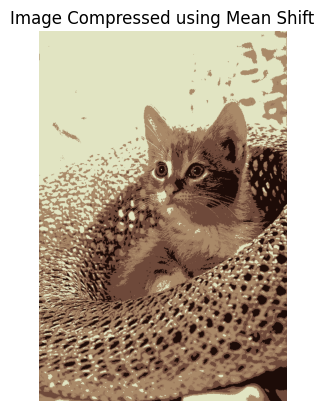

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
import numpy as np
import matplotlib.pyplot as plt
from skimage import io  # Using skimage to read images

# Load an image
img = io.imread('cat.png')
pixels = img.reshape(-1, 3)

# Estimate bandwidth for Mean Shift
bandwidth = estimate_bandwidth(pixels, quantile=0.1, n_samples=50)

# Apply Mean Shift clustering
meanshift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift.fit(pixels)

# Replace each pixel with its cluster center
cluster_centers = meanshift.cluster_centers_
clustered_pixels = np.array([cluster_centers[label] for label in meanshift.labels_])

# Re-organize the clustered pixels back into the original image shape
clustered_img = clustered_pixels.reshape(img.shape)

# Display the resulting image
plt.imshow(clustered_img.astype(np.uint8))
plt.title('Image Compressed using Mean Shift')
plt.axis('off')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering

# Load an image
img = io.imread('cat.png')
pixels = img.reshape(-1, 3)

# Number of clusters/colors you want in the compressed image
n_clusters = 10

# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
# Fit model
labels = hierarchical.fit_predict(pixels)

# Replace each pixel's color with the color of its cluster's centroid
clustered_pixels = np.zeros_like(pixels)
for cluster in range(n_clusters):
    mask = labels == cluster
    clustered_pixels[mask] = np.mean(pixels[mask], axis=0)

# Reshape to the original image shape
clustered_img = clustered_pixels.reshape(img.shape)

# Display the resulting image
plt.imshow(clustered_img.astype(np.uint8))
plt.title(f'Image Compressed using Hierarchical Clustering with {n_clusters} colors')
plt.axis('off')
plt.show()

MemoryError: Unable to allocate 481. GiB for an array with shape (64501364865,) and data type float64